# Attention in detail

This notebook tries to visualize and explain the attention concept used in deep learning and is based on:<br>
1. [Dissecting BERT](https://medium.com/dissecting-bert/dissecting-bert-part-1-d3c3d495cdb3) (initially triggered looking into attention)
* [Harvard NLP annotated transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html#attention)
* [Udacity DL attention notebook](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/attention/)
* [PyTorch einsum for attention](https://rockt.github.io/2018/04/30/einsum) (looking into attention is the perfect oppertunity to get comfortable with einsum)

In [3]:
# basic
import math

# PyTorch
import torch
import torch.nn.functional as F

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# random tensors function from https://rockt.github.io/2018/04/30/einsum
def random_tensors(shape, num=1, requires_grad=False):
    tensors = [torch.randn(shape, requires_grad=requires_grad) for i in range(0,num)]
    return tensors[0] if num == 1 else tensors

## Attention function

In [6]:
# dimensions = batch size x sequence length x embedding dimension
Y = random_tensors([3, 5, 7])

In [51]:
# attention function based on http://nlp.seas.harvard.edu/2018/04/03/attention.html#attention
def attention_transf(query, key, value):
    "Compute 'Scaled Dot Product Attention'"
    
    # scaling factor for scores
    d_k = query.size(-1)
    
    # matrix multiplication to get every dot product for query and transposed key
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    
    # apply softmax of the scores on the last dimensions (= sequence length)
    p_attn = F.softmax(scores, dim = -1)
    
    # matrix multiplication of attention matrix and value matrix to get output based
    out = torch.matmul(p_attn, value)
    
    return out, p_attn

In [53]:
# run Y through attention function
out, p_attn = attention_transf(Y, Y, Y)

In [54]:
# print shapes
Y.shape, p_attn.shape, out.shape

(torch.Size([3, 5, 7]), torch.Size([3, 5, 5]), torch.Size([3, 5, 7]))

## Attention shapes step by step

In [91]:
# input dimmension = batch size x sequence length x embedding dimension
Y.shape

torch.Size([3, 5, 7])

In [90]:
# transpose the last two dimension to enable matrix multiplication in the next step
Y.transpose(-2, -1).shape

torch.Size([3, 7, 5])

In [92]:
# matrix multiplication for attention matrix
torch.matmul(Y, Y.transpose(-2, -1)).shape

torch.Size([3, 5, 5])

In [56]:
# matrix multiplication for output
torch.matmul(torch.matmul(Y, Y.transpose(-2, -1)), Y).shape

torch.Size([3, 5, 7])

### Softmax dimension in attention matrix

In [57]:
# check attention matrix shape
p_attn.shape

torch.Size([3, 5, 5])

In [58]:
# print attention matrix
p_attn

tensor([[[0.6017, 0.0839, 0.1114, 0.1045, 0.0984],
         [0.0055, 0.8762, 0.0892, 0.0128, 0.0162],
         [0.0266, 0.3246, 0.5301, 0.0697, 0.0489],
         [0.0542, 0.1010, 0.1512, 0.4624, 0.2312],
         [0.0668, 0.1676, 0.1387, 0.3024, 0.3246]],

        [[0.2953, 0.1999, 0.0859, 0.2569, 0.1620],
         [0.1792, 0.3350, 0.1916, 0.1445, 0.1497],
         [0.1008, 0.2510, 0.3771, 0.1121, 0.1589],
         [0.2353, 0.1477, 0.0875, 0.3771, 0.1525],
         [0.1972, 0.2033, 0.1647, 0.2027, 0.2321]],

        [[0.9461, 0.0154, 0.0095, 0.0027, 0.0264],
         [0.2080, 0.2863, 0.1079, 0.2363, 0.1616],
         [0.0994, 0.0840, 0.4246, 0.0979, 0.2940],
         [0.0193, 0.1271, 0.0676, 0.7351, 0.0508],
         [0.1804, 0.0820, 0.1914, 0.0479, 0.4983]]])

In [59]:
# print first attention vector = dimension of softmax
p_attn[0,0]

tensor([0.6017, 0.0839, 0.1114, 0.1045, 0.0984])

In [64]:
# verify that softmax adds up to 1
p_attn[0,0].sum().item()

1.0

In [66]:
# verify that softmax adds up to 1 for every row in the attention matrix
p_attn.sum(dim=2)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])

## Visualization

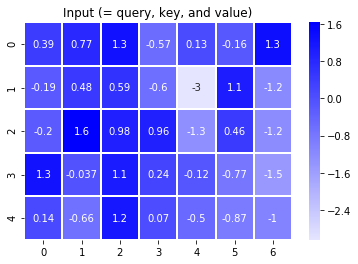

In [73]:
# input
sns.heatmap(Y[0].numpy(), annot=True, cmap=sns.light_palette('blue', as_cmap=True), linewidths=1).set_title('Input (= query, key, and value)');

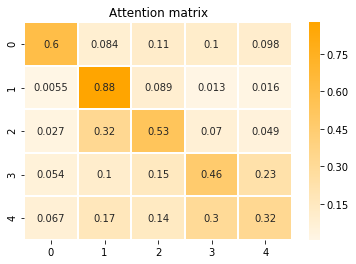

In [74]:
# attention matrix
sns.heatmap(p_attn[0].numpy(), annot=True, cmap=sns.light_palette('orange', as_cmap=True), linewidths=1).set_title('Attention matrix');

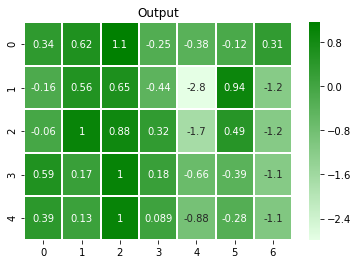

In [72]:
# output
sns.heatmap(out[0].numpy(), annot=True, cmap=sns.light_palette("green", as_cmap=True), linewidths=1).set_title('Output');

Example calculation for the the first element in the output:<br>
The dot product of the first row of the attention matrix (p_attn[0,0]) with the first column of the value matrix (Y[0,:,0]).<br>
0.6 * 0.39 + 0.084 * -0.19 + 0.11 * -0.2 + 0.1 * 1.3 + 0.098 * 0.14 = 0.34 (0.33976)

In [90]:
p_attn[0,0].view(1,-1)

tensor([[0.6017, 0.0839, 0.1114, 0.1045, 0.0984]])

In [87]:
Y[0,:,0].view(-1,1)

tensor([[ 0.3925],
        [-0.1888],
        [-0.1954],
        [ 1.2566],
        [ 0.1372]])

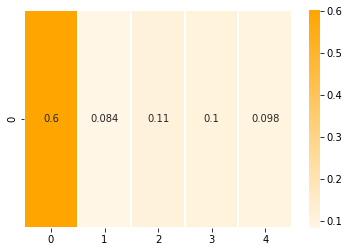

In [93]:
# attention matrix
sns.heatmap(p_attn[0,0].view(1,-1).numpy(), annot=True, cmap=sns.light_palette('orange', as_cmap=True), linewidths=1);

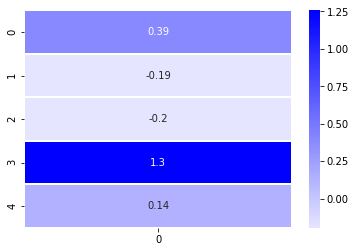

In [95]:
# input
sns.heatmap(Y[0,:,0].view(-1,1).numpy(), annot=True, cmap=sns.light_palette('blue', as_cmap=True), linewidths=1);

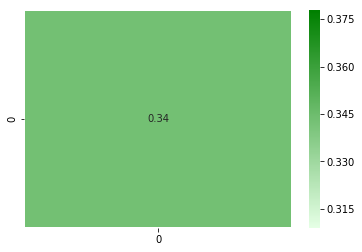

In [98]:
# output
sns.heatmap(out[0,0,0].view(1,1).numpy(), annot=True, cmap=sns.light_palette("green", as_cmap=True), linewidths=1);